In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from keras.utils import to_categorical

In [7]:
t_img = mpimg.imread('Train/Train/0/1.png')

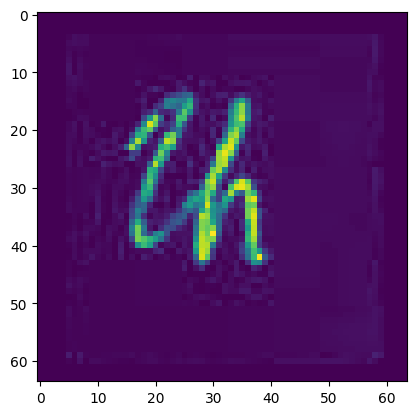

In [13]:
plt.imshow(t_img)

In [15]:
X = []
y = []
for i in os.listdir('Train/Train/'):
    for j in os.listdir(f'Train/Train/{i}'):
        img = mpimg.imread(f'Train/Train/{i}/{j}')
        img = img.reshape(1, 64, 64)
        X.append(img)
        y.append(int(i))
X = torch.tensor(X, dtype=torch.float64)
y = torch.tensor(y, dtype=torch.float64)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27920\1332908002.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  X = torch.tensor(X, dtype=torch.float64)


In [37]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27920\1211342857.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27920\1211342857.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [40]:
y.shape

torch.Size([70060])

In [41]:
y_cat = to_categorical(y, num_classes=78)

In [42]:
y_cat = torch.tensor(y_cat, dtype=torch.int64)

In [43]:
y_cat

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [44]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5), # 32 x 60 x 60
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2), # 32x 30 x 30

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5), # 64 X 26, 26
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2), # 64, 13, 13

    nn.Flatten(),
    nn.Linear(in_features=64 * 13 * 13, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=78),
    nn.Softmax()
    
)

In [45]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

In [46]:
iter_ = 50
for i in range(iter_):
    model.train()
    y_pred = model(X)
    loss = loss_fn(y, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'loss {loss}')        

RuntimeError: [enforce fail at alloc_cpu.cpp:116] data. DefaultCPUAllocator: not enough memory: you tried to allocate 32283648000 bytes.

# Keras

In [48]:
X = np.array(X)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27920\55319187.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  X = np.array(X)


In [50]:
X = []
y = []
for i in os.listdir('Train/Train/'):
    for j in os.listdir(f'Train/Train/{i}'):
        img = mpimg.imread(f'Train/Train/{i}/{j}')
        img = img.reshape(64, 64, 1)
        X.append(img)
        y.append(int(i))
X = np.array(X)
y = np.array(y)

In [51]:
y_cat = to_categorical(y, num_classes=78)

In [100]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

In [101]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=78, activation='softmax'))

C:\Users\ASUS\Desktop\ml_18-35\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 60, 60, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │          54,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 78)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,522 (318.45 KB)

 Trainable params: 81,522 (318.45 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
X.shape

(70060, 64, 64, 1)

In [105]:
y_cat.shape

(70060, 78)

In [106]:
model.fit(X, y_cat, epochs=5)

Epoch 1/5
2190/2190 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.0115 - loss: 4.4338
Epoch 2/5
 214/2190 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.0143 - loss: 4.3910

KeyboardInterrupt: 

In [69]:
df_test = pd.read_csv('new_test/new_test.csv')

In [81]:
df_test = df_test.values.reshape(50000, 64, 64, 1)

In [94]:
y_pred = model.predict(df_test / 255)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step


In [95]:
df_sub = pd.read_csv('sample_submission.csv')

In [96]:
y_pred = [np.argmax(i) for i in y_pred]

In [97]:
y_pred

[np.int64(63),
 np.int64(2),
 np.int64(22),
 np.int64(36),
 np.int64(7),
 np.int64(52),
 np.int64(13),
 np.int64(18),
 np.int64(68),
 np.int64(18),
 np.int64(46),
 np.int64(67),
 np.int64(46),
 np.int64(67),
 np.int64(57),
 np.int64(18),
 np.int64(24),
 np.int64(68),
 np.int64(7),
 np.int64(45),
 np.int64(18),
 np.int64(53),
 np.int64(48),
 np.int64(75),
 np.int64(45),
 np.int64(76),
 np.int64(50),
 np.int64(18),
 np.int64(7),
 np.int64(18),
 np.int64(18),
 np.int64(7),
 np.int64(44),
 np.int64(25),
 np.int64(68),
 np.int64(7),
 np.int64(9),
 np.int64(46),
 np.int64(18),
 np.int64(7),
 np.int64(75),
 np.int64(46),
 np.int64(40),
 np.int64(46),
 np.int64(32),
 np.int64(22),
 np.int64(7),
 np.int64(50),
 np.int64(18),
 np.int64(18),
 np.int64(26),
 np.int64(13),
 np.int64(43),
 np.int64(15),
 np.int64(45),
 np.int64(18),
 np.int64(0),
 np.int64(18),
 np.int64(18),
 np.int64(7),
 np.int64(76),
 np.int64(67),
 np.int64(29),
 np.int64(18),
 np.int64(36),
 np.int64(21),
 np.int64(7),
 np.int

In [98]:
df_sub['Category'] = y_pred

In [99]:
df_sub.to_csv('sub.csv', index=False, index_label=False)